# House Price Challenge

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

Number of features:

In [3]:
train.shape[1]

81

Training data size:

In [4]:
train.shape[0]

1460

Test data size:

In [5]:
test.shape[0]

1459

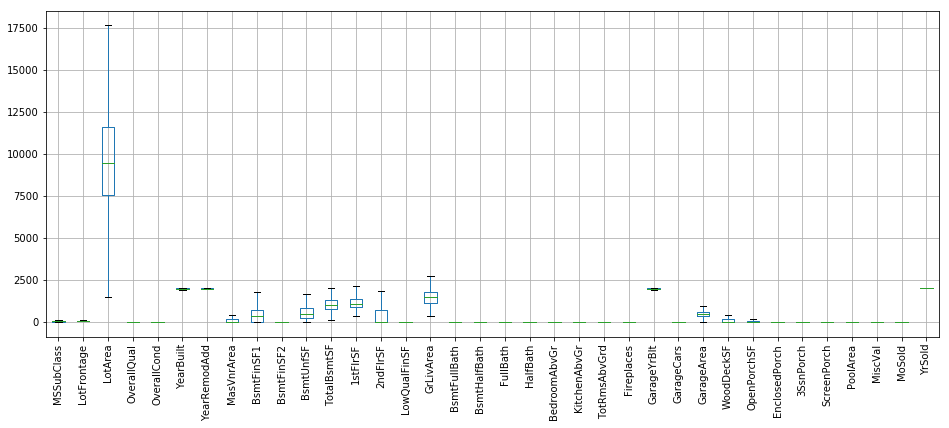

In [6]:
plt.rcParams['figure.figsize'] = (16, 6)
train.iloc[:,1:-1].boxplot(showfliers=False, rot=90)
plt.show()

In [7]:
num_feat = (train.dtypes != "object").as_matrix()

In [8]:
train_num = train.iloc[:, num_feat]

In [9]:
(train_num < 0).any().any()

False

In [10]:
train_num = train_num.fillna(train_num.mean())
train.iloc[:, num_feat] = train_num

In [11]:
test_num = test.iloc[:, num_feat[:-1]]
test_num = test_num.fillna(train_num.mean())
test.iloc[:, num_feat[:-1]] = test_num

In [12]:
(train_num < 0).any().any()

False

Log(1+p) transform for skewed features:

In [13]:
skewed = (np.absolute(skew(train_num)) > 1.)

In [14]:
skewed[0] = False
skewed[-1] = False

In [15]:
train_num.iloc[:, skewed] = np.log1p(train_num.iloc[:, skewed])

In [16]:
test_num.iloc[:, skewed[:-1]] = np.log1p(test_num.iloc[:, skewed[:-1]])

In [17]:
train.iloc[:, num_feat] = train_num

In [18]:
test.iloc[:, num_feat[:-1]] = test_num

Normalize numerical features:

In [19]:
scaler = StandardScaler().fit(train_num)

In [26]:
train_num.shape

(1460, 38)

In [20]:
train.iloc[:, num_feat] = scaler.transform(train_num)

In [23]:
test.iloc[:, num_feat[:-1]] = scaler.transform(test_num)

ValueError: operands could not be broadcast together with shapes (1459,37) (38,) (1459,37) 

Categorical to numerical features:

In [ ]:
train_test = pd.concat([train.iloc[:,:-1], test])

In [ ]:
train_test = pd.get_dummies(train_test)

In [ ]:
train_test.iloc[:,1:100].boxplot(showfliers=False, rot=90)
plt.show()

In [ ]:
train_test.iloc[:, 1:].shape

In [ ]:
train_test.iloc[:, 1:] = (train_test.iloc[:, 1:] - train_test.iloc[0:train.shape[0], 1:].mean()) / train_test.iloc[0:train.shape[0], 1:].std()

In [ ]:
train_test.iloc[:,1:100].boxplot(showfliers=False, rot=90)
plt.show()

In [ ]:
np.sum(train_test["Street_Pave"] == 1) / train_test.shape[0]

In [ ]:
np.sum(train_test["Street_Pave"] == 0) / train_test.shape[0]

In [ ]:
train_test.shape[1]

In [ ]:
X = train_test.iloc[0:train.shape[0], 1:]
y = train.iloc[:, -1]
kaggle_test = train_test.iloc[train.shape[0]:, :]

In [ ]:
X_train, X_test, y_train, y_true = train_test_split(X, y)

In [ ]:
plt.scatter(X_train.iloc[:, 1], y_train)
plt.show()

In [ ]:
lin_reg = linear_model.LinearRegression()

In [ ]:
lin_reg.fit(X_train.iloc[:, 1:], y_train)

In [ ]:
y_pred = lin_reg.predict(X_test.iloc[:, 1:])

In [ ]:
np.sqrt(mean_squared_error(y_true, y_pred))

In [ ]:
y_true.head()

In [ ]:
ridge = linear_model.Ridge(alpha=1.)

In [ ]:
ridge.fit(X_train.iloc[:, 1:], y_train)

In [ ]:
y_pred = ridge.predict(X_test.iloc[:, 1:])

In [ ]:
np.sqrt(mean_squared_error(y_true, y_pred))